# Plotting for Harvesting example

### Import Packages

In [7]:
## General purpose
import numpy as np
import os

## Plotting-specific
import matplotlib.pyplot as plt

## Set plotting defaults
# mathtextsize = 18
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)

## ODE Solver
from scipy.integrate import solve_ivp, trapezoid

## Symbolic math
import sympy as sym

### Specify parameters

In [2]:
tspan = [0,20]
y0    = [4]
r     = 2
A     = 1
K     = [3.8, 4.0, 4.2]
h     = 1.057

In [3]:
## Figures will be saved to Ex7/...
## This code creates this directory if it does not already exist
write_directory = 'Ex7'
if not os.path.exists(write_directory):
    os.makedirs(write_directory)
    
filenames = ['K38Y4','K40Y4','K42Y4']

## Plotting solutions of ODE

[[14.86523184]]


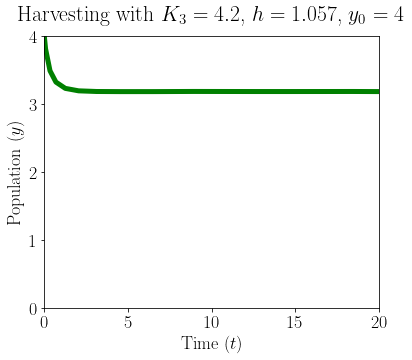

In [18]:
colors = ['r','b','g']
def no_return(t,y):
    return y[0] - 1.0

for n in range(len(K)):
    ## Solving ODE
    def dydt(t,y):
        return r*y*(y/A-1)*(1-y/K[n])-h*y
    
    sol = solve_ivp(dydt,tspan,y0,events=no_return,vectorized=True)
    
    ## For K=3.8, calculate number of fish harvested
    if (n == 0):
        idx = np.argmin(sol.t < sol.t_events)
        t1 = np.concatenate([sol.t[0:idx], sol.t_events], axis=None)
        y1 = np.concatenate([sol.y[0,0:idx], 1.0], axis=None)
        
        harvest = (trapezoid(y1,t1) - sol.t_events)*h
        print(harvest)
    
    ## Plotting solution of ODE
    plt.close()    
    fig, ax = plt.subplots(1,1,figsize = [6,5])
    ax.set_xlim(tspan)
    ax.set_ylim(0,4)
    ax.set_yticks([0,1,2,3,4])

    plt.plot(sol.t,sol.y[0,:],colors[n],linewidth=5)
    ax.set_xlabel('Time $(t)$')
    ax.set_ylabel('Population $(y)$')
    ax.set_title('Harvesting with $K_' + str(n+1) + ' = ' + str(K[n]) + '$, $h = 1.057$, $y_0 = ' + str(y0[0]) + '$',pad=15)
    fig.savefig('Ex7/' + filenames[n] + '.pdf')

## Plotting Bifurcation diagram

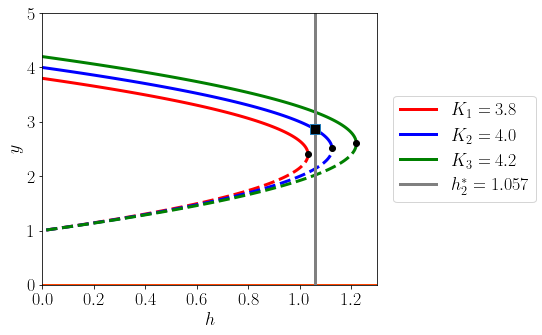

In [19]:
## Plotting setup
fig, ax = plt.subplots(1,1,figsize = [6,5])
colors = [(1,0,0),(0,0,1),(0,0.5,0)]

## Setting up for computing bifurcation diagram
h1 = sym.Symbol('h1')
y2 = sym.Symbol('y2')
ylist = np.linspace(0,5,200)

for n in range(len(K)):
    ## Calculate bifurcation diagram via sympy
    bif = r*y2*(y2/A-1)*(1-y2/K[n])-h1*y2
    solveh = sym.solve(bif,h1)
    solveh_np = sym.lambdify(y2,solveh,"numpy")
    hlist = solveh_np(ylist)
    
    ## Plot bifurcation diagram
    vertex = int((1+K[n])/2*40)
    ax.plot(hlist[0][1:vertex], ylist[1:vertex],'--',color=colors[n],linewidth=3)
    ax.plot(hlist[0][vertex:],  ylist[vertex:], color=colors[n],linewidth=3,label='$K_'+str(n+1)+' = '+str(K[n])+'$')
    ax.plot(hlist[0][vertex],   ylist[vertex],  'k.',markersize=12)

## Finish setting up figure
ax.axhline(0,color=(1,0.27,0),linewidth=3)
ax.axvline(1.057,color=(0.5,0.5,0.5),linewidth=3,label='$h_2^* = 1.057$')
ax.plot(1.057,2.869,'s',markersize=10,markerfacecolor='k')
ax.set_xlim(0,1.3)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1,1.2])
ax.set_ylim(0,5)
ax.set_xlabel('$h$')
ax.set_ylabel('$y$')
plt.legend(loc='right',bbox_to_anchor=(1.5,0.5))
fig.savefig('Ex7/bifurcation.pdf',bbox_inches='tight')